Now that we have predicted the desired values through all the 3 models - RNN, LSTM and ARIMA and also evaluated their performance using metrics like - RMSE Score and R<sup>2</sup> (R-square) score, these can be tough to explain to an unspohisticated brain (someone who might not be having expertise in ML).  Hence, I will be comparing these predicted results on the basis of numerical measure known as, <b>`CORRELATION COEFFICIENT`</b>. The relationship between the <b><i>`correlation coefficient matrix`</i></b>, <mark><b>&nbsp;R&nbsp;</b></mark>&nbsp;, and the <b><i>`covariance matrix`</b></i>, <mark><b>&nbsp;C&nbsp;</b></mark>&nbsp;, is 🔽

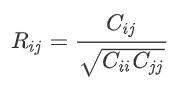

NOTE⚡: <b><i>`Covariance Matrix`</i></b> is a square matrix giving the covariance between each pair of elements of a given random vector / 2 vectors (comparing elements pair-wise from both the vectors).

In [ ]:
# Lets import the necessary libraries

import numpy as np
import pandas as pd

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset, to which comparison has to be done

df = pd.read_csv("drive/Othercomputers/My Laptop/CAPSTONE PROJECT/Power datasets/FullSchedule-InjectionSummary-UNCHAHAR4(216)-06-01-2023.csv")
df

,Time Block,Time Desc,UNCHAHAR4,Grand Total
0,1,00:00-00:15,257.81,257.81
1,2,00:15-00:30,257.81,257.81
2,3,00:30-00:45,257.81,257.81
3,4,00:45-01:00,257.81,257.81
4,5,01:00-01:15,257.81,257.81
...,...,...,...,...
91,92,22:45-23:00,396.75,396.75
92,93,23:00-23:15,324.75,324.75
93,94,23:15-23:30,257.81,257.81
94,95,23:30-23:45,257.81,257.81


In [ ]:
# Let us see the General information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time Block   96 non-null     int64  
 1   Time Desc    96 non-null     object 
 2   UNCHAHAR4    96 non-null     float64
 3   Grand Total  96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [ ]:
# Now that we only want the power generation values of the powerplant
# of the initial 10 blocks of the day, we will filter that out and store
# in a separate variable

data = df.filter(['UNCHAHAR4'])
data_comp = data['UNCHAHAR4'][:10]
data_comp

0    257.81
1    257.81
2    257.81
3    257.81
4    257.81
5    257.81
6    257.81
7    257.81
8    257.81
9    257.81
Name: UNCHAHAR4, dtype: float64

In [ ]:
# Converting the extracted data into Numpy Array

data_comp_array = data_comp.values
print(data_comp_array)

[257.81 257.81 257.81 257.81 257.81 257.81 257.81 257.81 257.81 257.81]


In [ ]:
# Now we will import the predicted values of the models. These are
# stored in Text files (.txt files)

# RNN
filename1 = 'drive/Othercomputers/My Laptop/CAPSTONE PROJECT/Forecast_RNN.txt'
data_RNN = np.loadtxt(filename1, delimiter=' ', skiprows=0, dtype=float)
data_RNN = np.round(data_RNN, decimals = 2)
print("RNN : 🔽\n")
print(data_RNN)

print("\n\n")

# LSTM
filename2 = 'drive/Othercomputers/My Laptop/CAPSTONE PROJECT/Forecast_LSTM.txt'
data_LSTM = np.loadtxt(filename2, delimiter=' ', skiprows=0, dtype=float)
data_LSTM = np.round(data_LSTM, decimals = 2)
print("LSTM : 🔽\n")
print(data_LSTM)

print("\n\n")

# ARIMA
filename3 = 'drive/Othercomputers/My Laptop/CAPSTONE PROJECT/Forecast_ARIMA.txt'
data_ARIMA = np.loadtxt(filename3, delimiter=' ', skiprows=0, dtype=float)
data_ARIMA = np.round(data_ARIMA, decimals = 2)
print("ARIMA : 🔽\n")
print(data_ARIMA)

RNN : 🔽

[257.81 306.05 327.89 330.21 293.58 330.86 311.55 282.77 335.28 314.59]



LSTM : 🔽

[257.81 273.84 277.02 288.66 257.99 282.44 286.61 266.95 295.54 295.88]



ARIMA : 🔽

[226.51 193.82 243.03 207.11 182.52 195.08 207.72 220.4  233.06 242.48]


In [ ]:
# Now that we have loaded all the required vectors, it's time to compare them
# using the CORRELATION COEFFICIENT.

# RNN
df_Corr_RNN = pd.DataFrame({'Data_Original' : data_comp, 'Data_RNN' : data_RNN})
Corr_RNN = df_Corr_RNN['Data_Original'].corr(df_Corr_RNN['Data_RNN'])
print("Correlation Coefficient (RNN & Original Data) : " + str(float(Corr_RNN)))

# LSTM
df_Corr_LSTM = pd.DataFrame({'Data_Original' : data_comp, 'Data_LSTM' : data_LSTM})
Corr_LSTM = df_Corr_LSTM['Data_Original'].corr(df_Corr_LSTM['Data_LSTM'])
print("Correlation Coefficient (LSTM & Original Data) : " + str(float(Corr_LSTM)))

# ARIMA
df_Corr_ARIMA = pd.DataFrame({'Data_Original' : data_comp, 'Data_ARIMA' : data_ARIMA})
Corr_ARIMA = df_Corr_ARIMA['Data_Original'].corr(df_Corr_ARIMA['Data_ARIMA'])
print("Correlation Coefficient (ARIMA & Original Data) : " + str(float(Corr_ARIMA)))


Correlation Coefficient (RNN & Original Data) : nan
Correlation Coefficient (LSTM & Original Data) : nan
Correlation Coefficient (ARIMA & Original Data) : nan


In [ ]:
# Lets calculate the RMSE and R-Square for the predicted values
# w.r.t. original data-points

from sklearn import metrics

# RMSE for LSTM model prediction
mse_lstm = metrics.mean_squared_error(data_comp_array, data_LSTM)
rmse_lstm = np.sqrt(mse_lstm)
print("LSTM ▶️ RMSE : ", rmse_lstm)

# R-Square score for LSTM model prediction
r2_lstm = metrics.r2_score(data_comp_array, data_LSTM)
print("LSTM ▶️ r2 : ", r2_lstm)

print("\n")

# RMSE for RNN model prediction
mse_rnn = metrics.mean_squared_error(data_comp_array, data_RNN)
rmse_rnn = np.sqrt(mse_rnn)
print("RNN ▶️ RMSE : ", rmse_rnn)

# R-Square score for LSTM model prediction
r2_rnn = metrics.r2_score(data_comp_array, data_RNN)
print("RNN ▶️ r2 : ", r2_rnn)

print("\n")

# RMSE for ARIMA model prediction
mse_arima = metrics.mean_squared_error(data_comp_array, data_ARIMA)
rmse_arima = np.sqrt(mse_arima)
print("ARIMA ▶️ RMSE : ", rmse_arima)

# R-Square score for ARIMA model prediction
r2_arima = metrics.r2_score(data_comp_array, data_ARIMA)
print("ARIMA ▶️ r2 : ", r2_arima)

LSTM ▶️ RMSE :  24.434062699436623
LSTM ▶️ r2 :  0.0


RNN ▶️ RMSE :  56.42022500841342
RNN ▶️ r2 :  0.0


ARIMA ▶️ RMSE :  47.141354562634284
ARIMA ▶️ r2 :  0.0


In [ ]:
# You see, LSTM has the lowest RMSE score (or, just showing the lowest error
# rate) among all. 

## <i><b>Hence, no such correlation exists between the original values and the predicted values of the models, as `NaN` refers to `ZERO` correlation.</b></i>

In [ ]:
# Lastly, have a look to the combined dataframe of all the data

Final_df = pd.DataFrame({'Data_Original' : data_comp_array , 'Data_RNN' : data_RNN , 'Data_LSTM' : data_LSTM , 'Data_ARIMA' : data_ARIMA})
Final_df

,Data_Original,Data_RNN,Data_LSTM,Data_ARIMA
0,257.81,257.81,257.81,226.51
1,257.81,306.05,273.84,193.82
2,257.81,327.89,277.02,243.03
3,257.81,330.21,288.66,207.11
4,257.81,293.58,257.99,182.52
5,257.81,330.86,282.44,195.08
6,257.81,311.55,286.61,207.72
7,257.81,282.77,266.95,220.40
8,257.81,335.28,295.54,233.06
9,257.81,314.59,295.88,242.48


In [ ]:
# Adding Time slabs as the first column

new_time_desc = df['Time Desc'][:10]
new_time_desc = np.asarray(new_time_desc)
Final_df.insert(0,"Time Desc",new_time_desc,True)
Final_df

,Time Desc,Data_Original,Data_RNN,Data_LSTM,Data_ARIMA
0,00:00-00:15,257.81,257.81,257.81,226.51
1,00:15-00:30,257.81,306.05,273.84,193.82
2,00:30-00:45,257.81,327.89,277.02,243.03
3,00:45-01:00,257.81,330.21,288.66,207.11
4,01:00-01:15,257.81,293.58,257.99,182.52
5,01:15-01:30,257.81,330.86,282.44,195.08
6,01:30-01:45,257.81,311.55,286.61,207.72
7,01:45-02:00,257.81,282.77,266.95,220.40
8,02:00-02:15,257.81,335.28,295.54,233.06
9,02:15-02:30,257.81,314.59,295.88,242.48


<Axes: xlabel='Time Desc'>

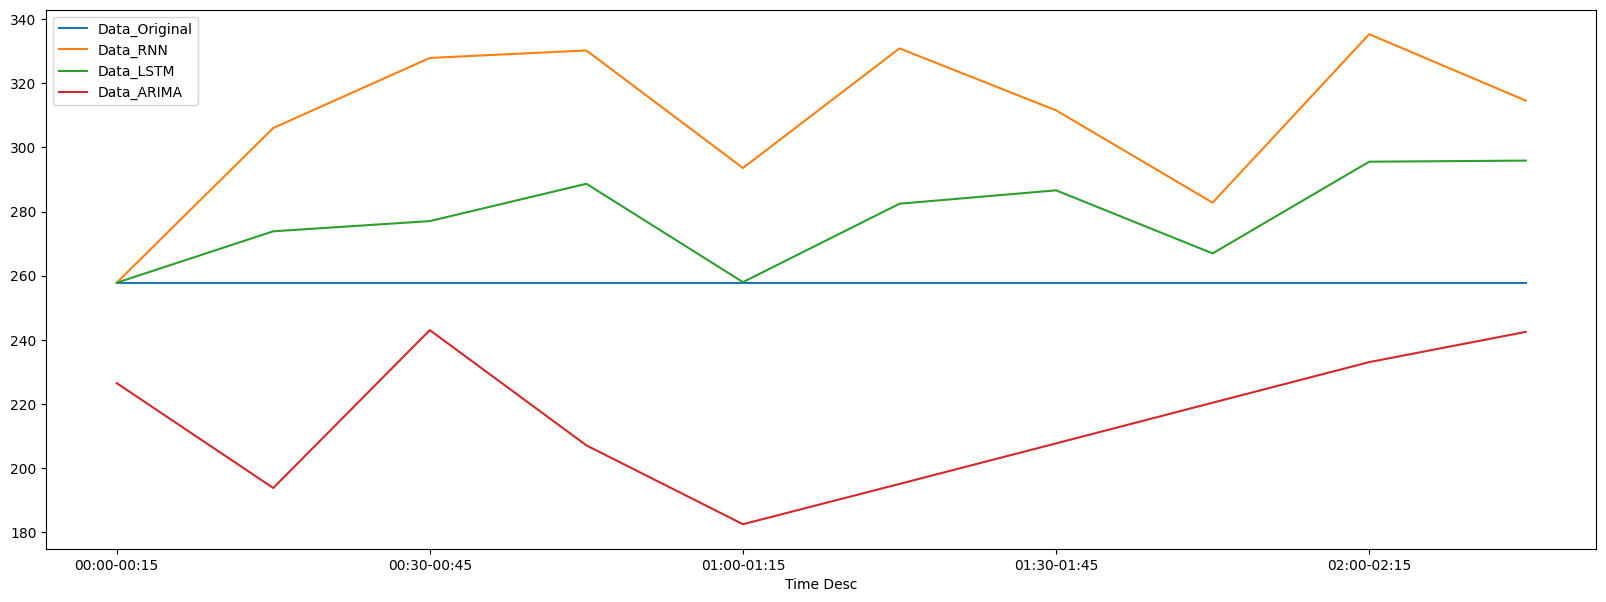

In [ ]:
# Creating line graph for the above Data-Frame

Final_df.plot(x="Time Desc", y=["Data_Original", "Data_RNN", "Data_LSTM" , "Data_ARIMA"], kind="line", figsize=(20, 7))

In [ ]:
# Now that we have a plot of all th required data-points, let us try to do an 
# experiment. I will now try to find out the average of the data-points
# from all the arrays of predicted values of (LSTM ,RNN, ARIMA), and compare
# that to the original values

import math

res_list = []
for i,j,k in zip(data_RNN,data_LSTM,data_ARIMA):
  res_list.append(float(("{0:.2f}".format(math.ceil((i+j+k)/3)))))

res_array = np.array(res_list)
print(res_array)

[248. 258. 283. 276. 245. 270. 269. 257. 288. 285.]


In [ ]:
# Let us try the metrics

# RMSE for Resultant (AVG) values
mse_res = metrics.mean_squared_error(data_comp_array, res_array)
rmse_res = np.sqrt(mse_res)
print("Resultant ▶️ RMSE : ", rmse_res)

# R-Square score for Resultant (AVG) values
r2_res = metrics.r2_score(data_comp_array, res_array)
print("ARIMA ▶️ r2 : ", r2_res)

Resultant ▶️ RMSE :  17.75100278857507
ARIMA ▶️ r2 :  0.0


In [ ]:
# Thus, taking the average of the prediction values, have significantly
# lowered the error rate.

In [ ]:
# Lets compare through a visual represenation using a line plot

# First I have to create a data frame with new columns and values
Final_df_new = pd.DataFrame({'Data_Original' : data_comp_array , 'Data_AVG' : res_array})
Final_df_new

,Data_Original,Data_AVG
0,257.81,248.0
1,257.81,258.0
2,257.81,283.0
3,257.81,276.0
4,257.81,245.0
5,257.81,270.0
6,257.81,269.0
7,257.81,257.0
8,257.81,288.0
9,257.81,285.0


In [ ]:
# Adding Time slabs as the first column to the new dataframe

new_time_desc = df['Time Desc'][:10]
new_time_desc = np.asarray(new_time_desc)
Final_df_new.insert(0,"Time Desc",new_time_desc,True)
Final_df_new

,Time Desc,Data_Original,Data_AVG
0,00:00-00:15,257.81,248.0
1,00:15-00:30,257.81,258.0
2,00:30-00:45,257.81,283.0
3,00:45-01:00,257.81,276.0
4,01:00-01:15,257.81,245.0
5,01:15-01:30,257.81,270.0
6,01:30-01:45,257.81,269.0
7,01:45-02:00,257.81,257.0
8,02:00-02:15,257.81,288.0
9,02:15-02:30,257.81,285.0


<Axes: xlabel='Time Desc'>

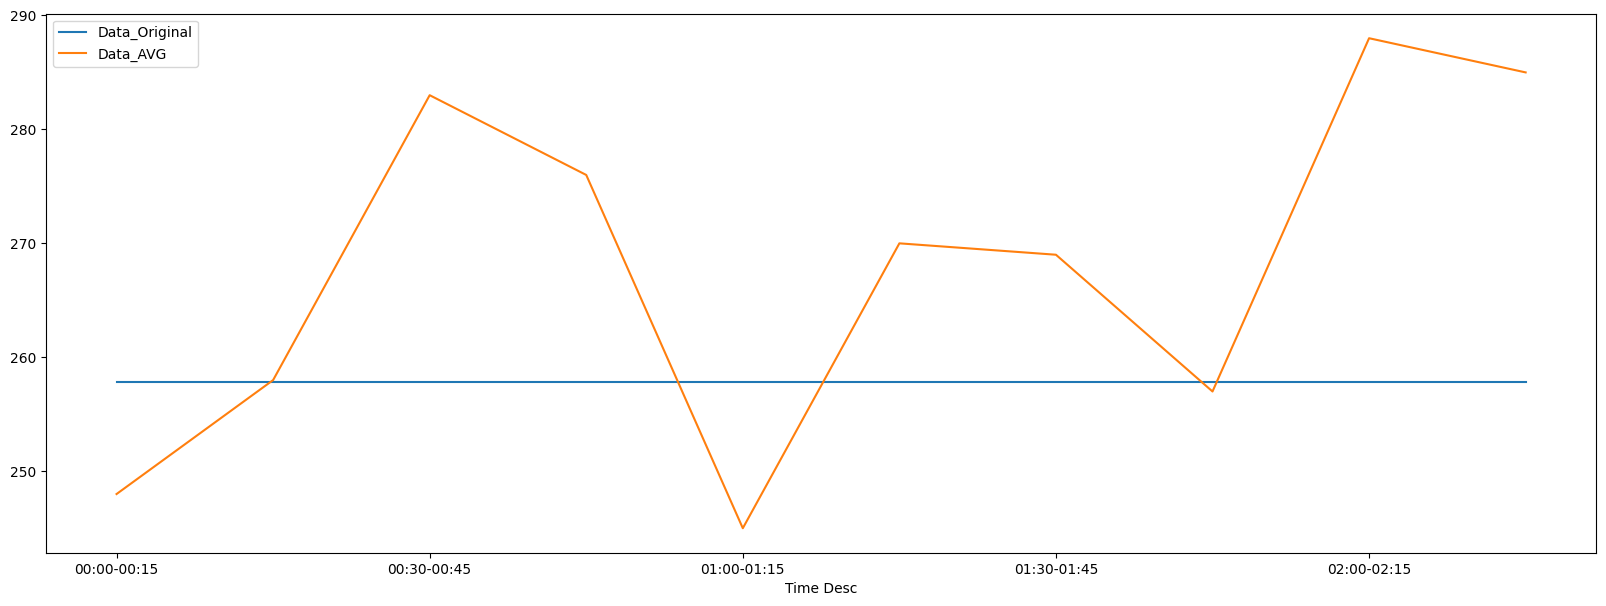

In [ ]:
# Creating line graph for the new Data-Frame

Final_df_new.plot(x="Time Desc", y=["Data_Original", "Data_AVG"], kind="line", figsize=(20, 7))